In [3]:

import tensorflow as tf
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [5]:
def SSIMLoss(y_true, y_pred):
  y_true = tf.cast(y_true,tf.float32)
  y_pred = tf.cast(y_pred,tf.float32)
  ssimloss = 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))
  return ssimloss

In [4]:
def create_dataset():
    directory = "../assets/train_set/"
    data= []
    label= []
    for i in range(0, 10):
        for filename in os.listdir(directory+"0"+str(i)):
            if filename.endswith(".png"):
                img = Image.open(directory+"0"+str(i)+"/"+filename)
                data.append(np.array(img))
                label.append(i)
#             if len(data)% 100 ==0:
#                 break
    for filename in os.listdir(directory+"10"):
            if filename.endswith(".png"):
                img = Image.open(directory+"10/"+filename)
                data.append(np.array(img))
                label.append(10)
#             if len(data)% 100 ==0:
#                 break
    print(len(data))
    return data, label

In [5]:
data, labels= create_dataset() 

data = np.array(data)
data.shape

preprocessed_data = data/255
labels= np.array(labels).reshape(-1,1)

6571


In [6]:
from sklearn.model_selection import train_test_split

# split data in train/val/test set
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    preprocessed_data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_val_data, 
    train_val_labels,
    test_size=0.3, 
    random_state=42, 
    shuffle=True
)

In [9]:

from keras.models import load_model
cnn_model = load_model("../models/preprocessed_data_cnn_model.h5")

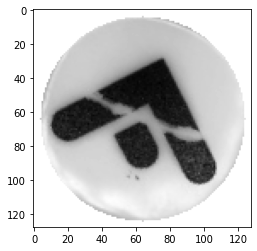

In [21]:
img = Image.open("../processed_data/train_set/ano/17_11_21_anomalies_014.png")
plt.imshow(img, cmap="gray")

In [22]:
prediction = cnn_model.predict(np.array(img).reshape(1, 128, 128, 1))
print(prediction)

[[-103.99642  -123.238075 -114.13031  -204.79478  -254.73589   334.13535 ]]


In [23]:
classes = np.argmax(prediction, axis = 1)
print(classes)

[5]


In [ ]:
def create_dataset():
    directory = "../../processed_data/train_set/"
    data= []
    label= []
    normal_ano = []

    pred_data = []
    pred_label = []
    pred_normal_ano = []
    for i in range(1, 7):
        for filename in os.listdir(directory+str(i)):
            if filename.endswith(".png"):
                img = Image.open(directory+str(i)+"/"+filename)
                data.append(np.array(img))
                label.append(i-1)   
                
    print(len(data))
    return data, label
            

[0]


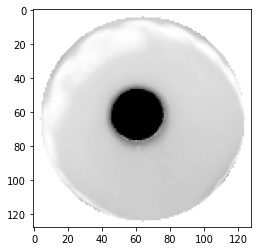

In [19]:

from keras.models import load_model
cnn_model = load_model("../models/preprocessed_data_cnn_model.h5")
autoencoder = load_model('../models/v0-1.h5')

data= []
label= []

pred_data = []
pred_label = []
pred_normal_ano = []

img = Image.open("../processed_data/train_set/1/16_09_21_00_000.png")
img = np.array(img).reshape(128,128,1)
img = img/255
pred = autoencoder.predict(img)
pred = np.array(pred).reshape(128,128,1)

prediction = cnn_model.predict(np.array(img).reshape(1, 128, 128, 1))

plt.imshow(pred,cmap='gray')
loss = SSIMLoss(img,pred)

label_format = 'SSIM Loss value: {:.3f}'
label_classes = 'Predicted Class: {}'



classes = np.argmax(prediction, axis = 1)
pred_label.append(label_classes.format(classes[0]+1))

print(classes)

temp_img = Image.open(f"../processed_data/templates/{classes[0]+1}.png")


# loss2 = SSIMLoss(img,prediction)

# ratio = loss/loss2
# print(ratio)

# print(label_format.format(loss/loss2))
# result = ""
# if loss/loss2 <0.70:
#     result = "anomaly"
# else: result = "normal"
    







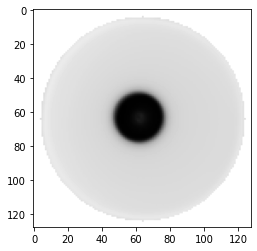

In [20]:
plt.imshow(temp_img,cmap='gray')
